In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
from graphviz import Digraph

In [ ]:
deals = pd.read_excel("/content/Deals_clear.xlsx")
spend = pd.read_excel("/content/Spend_clear.xlsx")

# Посчитать юнит-экономику по продуктам.

In [ ]:
deals.head()

Unnamed: 0                   Id Deal Owner Name        Closing Date  \
0           0  5805028000056864695        Ben Hall                 NaT   
1           1  5805028000056859489   Ulysses Adams                 NaT   
2           2  5805028000056832357   Ulysses Adams 2024-06-21 14:45:00   
3           3  5805028000056824246        Eva Kent 2024-06-21 13:32:00   
4           4  5805028000056873292        Ben Hall 2024-06-21 13:21:00   

             Quality     Stage     Lost Reason                  Campaign  \
0            Unknown  New Lead         Unknown             03.07.23women   
1            Unknown  New Lead         Unknown                   Unknown   
2     D - Non Target      Lost      Non target                engwien_AT   
3  E - Non Qualified      Lost  Invalid number  04.07.23recentlymoved_DE   
4     D - Non Target      Lost      Non target              discovery_DE   

              Content           Term  ...        Created Time Course duration  \
0                 v16          women  ... 2024-06-21 15:30:00             NaN   
1             Unknown        Unknown  ... 2024-06-21 15:23:00            6.00   
2               b1-at     21_06_2024  ... 2024-06-21 00:00:00             NaN   
3  bloggersvideo14com  recentlymoved  ... 2024-06-21 00:00:00             NaN   
4             website        Unknown  ... 2024-06-21 00:00:00             NaN   

  Months of study Initial Amount Paid Offer Total Amount         Contact Name  \
0             NaN                   0                  0  5805028000056849495   
1             NaN                   0               2000  5805028000056834471   
2             NaN                   0                  0  5805028000056854421   
3             NaN                   0                  0  5805028000056889351   
4             NaN                   0                  0  5805028000056876176   

   City  SLA Seconds  Difference in Days  Level of Deutsch_1  
0   NaN          NaN                 NaN             Unknown  
1   NaN          NaN                 NaN             Unknown  
2   NaN     1,603.00                0.00             Unknown  
3   NaN     3,604.00                0.00             Unknown  
4   NaN     3,192.00                0.00             Unknown  

[5 rows x 24 columns]

In [ ]:
spend.head()

Unnamed: 0       Date        Source               Campaign  Impressions  \
0           0 2023-07-03    Google Ads         gen_analyst_DE            6   
1           1 2023-07-03    Google Ads  performancemax_eng_DE            4   
2           2 2023-07-03  Facebook Ads                Unknown            0   
3           3 2023-07-03    Google Ads                Unknown            0   
4           4 2023-07-03           CRM                Unknown            0   

   Spend  Clicks  AdGroup       Ad  
0   0.00       0  Unknown  Unknown  
1   0.01       1  Unknown  Unknown  
2   0.00       0  Unknown  Unknown  
3   0.00       0  Unknown  Unknown  
4   0.00       0  Unknown  Unknown

In [ ]:
pd.set_option('display.float_format', '{:,.2f}'.format)

users = deals.groupby(['Product', 'Education Type'],
                      observed=True)['Id'].nunique().rename('UA')

bayers = deals[deals['Stage'] == 'Payment Done']\
        .groupby(['Product', 'Education Type'], observed=True
          )['Id'].nunique().rename('Bayers')

total_deals = deals[deals['Stage'] == 'Payment Done']\
        .groupby(['Product', 'Education Type'],
         observed=True)['Id'].count().rename('Total Deals')

gross_revenue = deals[deals['Stage'] == 'Payment Done']\
         .groupby(['Product', 'Education Type'],
         observed=True)['Offer Total Amount'].sum().rename('Gross Revenue')

merged_df = users.to_frame().join(
    [bayers, total_deals, gross_revenue], how='left').reset_index()

total_ac = spend['Spend'].sum()
merged_df['C1'] = merged_df['Bayers'] / merged_df['UA']
merged_df['AC'] = total_ac
merged_df['CPA'] = merged_df['AC'] / merged_df['UA']
merged_df['CAC'] = merged_df['AC'] / merged_df['Bayers']
merged_df['AOV'] = merged_df['Gross Revenue'] / merged_df['Bayers']
merged_df['APC'] = merged_df['Total Deals'] / merged_df['Bayers']
merged_df['CLTV'] = merged_df['AOV'] * merged_df['APC']
merged_df['LTV'] = merged_df['Gross Revenue'] / merged_df['UA']
merged_df['CM'] = (merged_df['CLTV'] - merged_df['CAC']) * merged_df['Bayers']

merged_df_sorted = merged_df.sort_values(by='Bayers', ascending=False)

merged_df_sorted = merged_df_sorted[['Product', 'Education Type', 'UA',
                                     'Bayers', 'C1', 'AC', 'CPA', 'CAC',
                                     'Gross Revenue', 'AOV', 'APC', 'CLTV',
                                     'LTV', 'CM', 'Total Deals']]

def format_number(value):
    return f'{value:,.0f}'.replace(',', ' ')

formatted_product_education_performance = merged_df_sorted.style.format({
    'UA': format_number,
    'Bayers': format_number,
    'Gross Revenue': format_number,
    'AC': format_number,
    'APC': '{:,.2f}'.format,
    'CAC': format_number,
    'CPA': format_number,
    'AOV': format_number,
    'CLTV': format_number,
    'LTV': format_number,
    'CM': format_number,
    'C1': '{:.2%}'.format,
    'Total Deals': format_number
}).hide(axis='index')

display(formatted_product_education_performance)

## Вывод: Продукты с высоким числом лидов (UA) и низкой конверсией (C1):

Утренние форматы Digital Marketing (23.34%), UX/UI Design (21.35%) и Web Developer (25.33%) имеют высокий объём лидов, но низкую конверсию. Это указывает на проблемы в этапе воронки продаж или недостаточную проработку аудитории.

Эффективность вечернего формата обучения:

Digital Marketing (Evening) и UX/UI Design (Evening) показывают значительно более высокий уровень конверсии (45.71% и 38.00% соответственно) по сравнению с утренними форматами.

Это подчеркивает потенциал вечернего формата для улучшения общих показателей бизнеса.

Высокая стоимость привлечения клиента (CAC):

Вечерние форматы имеют более высокие показатели CAC (например, Digital Marketing Evening - 1,327, UX/UI Design Evening - 2,607) по сравнению с утренними. Однако это компенсируется высокой конверсией.

Валовая прибыль (CM):

Утренний формат Digital Marketing и UX/UI Design имеют высокую валовую прибыль (3,244,076 и 1,437,776 соответственно), что говорит о хорошем потенциале увеличения выручки при работе с конверсией.

Вечерний формат Web Developer:

Формат практически отсутствует (UA = 1), что может указывать на необходимость анализа спроса на данный формат.
## Рекомендации: Для утренних форматов с низкой конверсией (Digital Marketing, UX/UI Design, Web Developer):

Провести анализ воронки продаж:

Проверить, на каком этапе лиды теряются.

Оптимизировать маркетинговые сообщения:

Усилить таргетинг рекламы.

Обучить продавцов:

Провести тренинги для повышения эффективности общения с клиентами.

Для вечерних форматов с высокой конверсией (Digital Marketing и UX/UI Design):

Масштабирование бюджета:

Увеличить маркетинговые вложения в вечерние форматы с высокой конверсией.

Улучшить управление затратами на привлечение (CAC):

Оптимизировать рекламные расходы, чтобы уменьшить CAC.

Развитие вечернего формата Web Developer:

Провести исследования спроса на вечерний формат обучения.

Запустить пробную кампанию для привлечения аудитории.

Увеличение CLTV через программы лояльности:

Внедрить программы для повышения повторных покупок, такие как скидки или бонусы за рекомендации.

# Из юнит-экономики определить точки роста бизнеса

In [ ]:
low_conversion = merged_df_sorted[
    (merged_df_sorted['C1'] < 0.3) &
    (merged_df_sorted['UA'] > 500)
]


high_cac_low_cltv = merged_df_sorted[
    (merged_df_sorted['CAC'] > merged_df_sorted['CLTV'])
]


high_aov = merged_df_sorted[
    (merged_df_sorted['AOV'] > merged_df_sorted['AOV'].median())
]


print("Продукты с низкой конверсией (низкий C1):")
print(low_conversion[['Product', 'Education Type', 'UA', 'C1', 'Gross Revenue']])

print("\nПродукты с высоким CAC и низким CLTV:")
print(high_cac_low_cltv[['Product', 'Education Type', 'CAC', 'CLTV', 'Gross Revenue']])

print("\nПродукты с высоким AOV:")
print(high_aov[['Product', 'Education Type', 'AOV', 'Gross Revenue']])

Продукты с низкой конверсией (низкий C1):
             Product Education Type    UA   C1  Gross Revenue
1  Digital Marketing        Morning  1491 0.23   3,392,700.00
3       UX/UI Design        Morning   787 0.21   1,586,400.00
5      Web Developer        Morning   533 0.25     576,200.00

Продукты с высоким CAC и низким CLTV:
Empty DataFrame
Columns: [Product, Education Type, CAC, CLTV, Gross Revenue]
Index: []

Продукты с высоким AOV:
             Product Education Type      AOV  Gross Revenue
1  Digital Marketing        Morning 9,749.14   3,392,700.00
3       UX/UI Design        Morning 9,442.86   1,586,400.00


## Вывод:У Digital Marketing (Morning), UX/UI Design (Morning) и Web Developer (Morning) есть высокий объём лидов (UA), но конверсия низкая (C1 около 23-25%). Это указывает на необходимость повышения эффективности воронки продаж.
## Рекомендации: Использовать более таргетированную рекламу.Усилить тренинги для менеджеров по продажам.Создать более эффективные скрипты общения.Изменить сообщения рекламы, чтобы они стали более персонализированными для целевой аудитории.

# Понять дерево метрик для бизнеса.


In [ ]:
tree = Digraph(comment='Business Metrics Tree', format='png')

tree.node('1', 'Gross Revenue (Общая выручка)', shape='box', style='filled', fillcolor='lightblue')

tree.node('2', 'UA (Количество лидов)', shape='box')
tree.node('3', 'C1 (Конверсия лидов в клиентов)', shape='box')
tree.node('4', 'AOV (Средняя стоимость заказа)', shape='box')
tree.node('5', 'CLTV (Пожизненная ценность клиента)', shape='box')

tree.node('6', 'CAC (Стоимость привлечения клиента)', shape='ellipse')
tree.node('7', 'APC (Среднее количество сделок на клиента)', shape='ellipse')

tree.edges([('1', '2'), ('1', '3'), ('1', '4'), ('1', '5')])

tree.edges([('5', '6'), ('5', '7')])

tree.render('business_metrics_tree', view=True)

'business_metrics_tree.png'

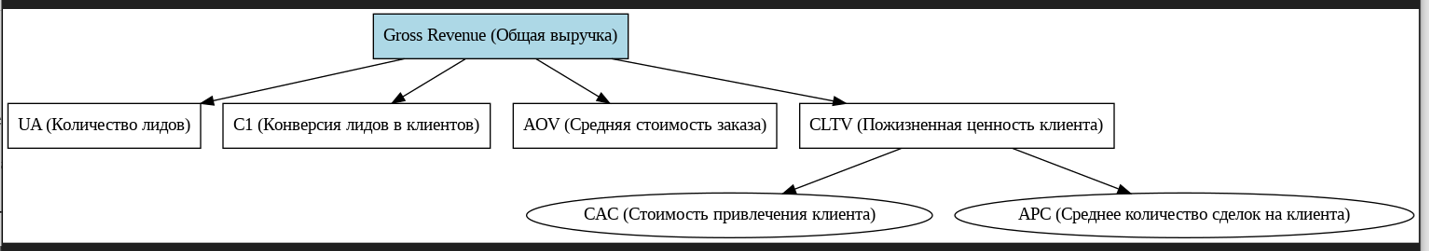

## Вывод: Главная метрика: Gross Revenue — общая выручка бизнеса, которая является конечной целью оптимизации.

Метрики второго уровня:

UA (Количество лидов): Количество привлечённых лидов напрямую влияет на выручку через увеличение объёма потенциальных клиентов.

C1 (Конверсия лидов в клиентов): Чем выше конверсия, тем больше лидов превращаются в покупателей.

AOV (Средняя стоимость заказа): Высокий средний чек повышает доход за каждую сделку.

CLTV (Пожизненная ценность клиента): Долгосрочная ценность клиента показывает суммарный доход от одного клиента за весь период взаимодействия.

Метрики третьего уровня:

CAC (Стоимость привлечения клиента): Затраты на привлечение клиентов должны быть оптимизированы, чтобы не превышать CLTV.

APC (Среднее количество сделок на клиента): Частота взаимодействий с клиентами увеличивает пожизненную ценность (CLTV)
## Рекомендации: Увеличение количества лидов (UA):

Расширение рекламных кампаний на более эффективные каналы (например, Organic, Webinar).

Увеличение активности на платформах с высоким ROI.

Повышение конверсии (C1):

Провести A/B тестирование рекламных сообщений, чтобы улучшить персонализацию.

Обучить продавцов и внедрить улучшенные скрипты общения для повышения продаж.

Увеличение средней стоимости заказа (AOV):

Добавить премиум-услуги или апселл, чтобы повысить средний чек.

Разработать пакетные предложения для увеличения стоимости заказов.

Увеличение пожизненной ценности клиента (CLTV):

Запуск программ лояльности, чтобы стимулировать повторные покупки.

Улучшение обслуживания и внедрение дополнительных услуг.

Оптимизация CAC:

Анализ каналов рекламы и перераспределение бюджетов на наиболее эффективные из них.

Сокращение затрат на менее выгодные источники лидов.

Повышение APC:

Создание стратегий повторных продаж, чтобы увеличить количество сделок на одного клиента.

Введение механизма подписок для увеличения частоты взаимодействия.

# Понять на какую метрику продукта они будут воздействовать и сформировать гипотезы.


In [ ]:
low_conversion = merged_df_sorted[merged_df_sorted['C1'] < 0.3]
print("Сегменты с низкой конверсией:")
print(low_conversion[['Product', 'Education Type', 'C1', 'UA']])

low_conversion['Hypothesis'] = "Изменение рекламных сообщений с акцентом на персонализацию для сегмента"

high_cac = merged_df_sorted[merged_df_sorted['CAC'] > merged_df_sorted['CLTV']]
print("\nСегменты с высоким CAC:")
print(high_cac[['Product', 'Education Type', 'CAC', 'CLTV']])

high_cac['Hypothesis'] = "Оптимизация рекламного бюджета через фокус на более эффективные каналы"

high_potential_cltv = merged_df_sorted[merged_df_sorted['CLTV'] > merged_df_sorted['CLTV'].median()]
print("\nСегменты с высоким потенциалом CLTV:")
print(high_potential_cltv[['Product', 'Education Type', 'CLTV', 'AOV']])

high_potential_cltv['Hypothesis'] = "Введение программы лояльности для увеличения повторных покупок"

hypotheses_df = pd.concat([low_conversion, high_cac, high_potential_cltv], axis=0)

print("\nГипотезы для улучшения бизнес-процессов:")
print(hypotheses_df[['Product', 'Education Type', 'Hypothesis']])

Сегменты с низкой конверсией:
             Product Education Type   C1    UA
1  Digital Marketing        Morning 0.23  1491
3       UX/UI Design        Morning 0.21   787
5      Web Developer        Morning 0.25   533

Сегменты с высоким CAC:
Empty DataFrame
Columns: [Product, Education Type, CAC, CLTV]
Index: []

Сегменты с высоким потенциалом CLTV:
             Product Education Type     CLTV      AOV
1  Digital Marketing        Morning 9,749.14 9,749.14
3       UX/UI Design        Morning 9,442.86 9,442.86

Гипотезы для улучшения бизнес-процессов:
             Product Education Type  \
1  Digital Marketing        Morning   
3       UX/UI Design        Morning   
5      Web Developer        Morning   
1  Digital Marketing        Morning   
3       UX/UI Design        Morning   

                                          Hypothesis  
1  Изменение рекламных сообщений с акцентом на пе...  
3  Изменение рекламных сообщений с акцентом на пе...  
5  Изменение рекламных сообщений с акцентом

## Вывод: Сегменты с низкой конверсией (C1 < 30%):

Продукты Digital Marketing (Morning), UX/UI Design (Morning) и Web Developer (Morning) имеют низкую конверсию при достаточно большом количестве лидов (1491, 787 и 533 соответственно).

Эти сегменты требуют улучшения этапов воронки продаж или рекламных кампаний.

Сегменты с высоким CAC:

В данном анализе таких сегментов не выявлено, что свидетельствует об эффективном соотношении стоимости привлечения клиента (CAC) и пожизненной ценности клиента (CLTV). Это позитивный знак.

Сегменты с высоким потенциалом CLTV:

Продукты Digital Marketing (Morning) и UX/UI Design (Morning) имеют высокий показатель CLTV (9,749.14 и 9,442.86 соответственно). Это указывает на успешные модели ценообразования и высокий средний чек (AOV). Их потенциал можно использовать для увеличения повторных покупок и продолжительности взаимодействия с клиентами.
## Рекомендации: Для сегментов с низкой конверсией (Digital Marketing, UX/UI Design, Web Developer):

Провести A/B тестирование рекламных сообщений с акцентом на персонализацию, чтобы увеличить конверсию лидов.

Оптимизировать процесс продаж:

Улучшить скрипты для менеджеров.

Провести дополнительное обучение сотрудников, работающих с клиентами.

Анализировать источники лидов для повышения их качества.

Для сегментов с высоким потенциалом CLTV (Digital Marketing, UX/UI Design):

Внедрить программы лояльности (например, скидки, бонусы за повторные покупки или рекомендации).

Разработать пакетные предложения:

Например, включить дополнительные услуги (персональные консультации, продвинутые модули) для клиентов.

Увеличить акцент на удержание текущих клиентов, предлагая эксклюзивные условия для повторных покупок.

Продолжить мониторинг CAC и CLTV:

Анализировать эффективность маркетинговых каналов, чтобы не допустить рост затрат на привлечение клиентов.

Увеличить бюджет на каналы с высокой окупаемостью (например, Organic, Webinar).

# Описать метод проверки гипотез с формулированием условия проведения гипотезы.

## Гипотеза увеличения конверсии (C1):
Метрика: Конверсия лидов в клиентов (C1).

Тест: Проведение A/B тестирования рекламных сообщений.

Условия:

Разделить целевую аудиторию на две группы:

Контрольная группа получает старую версию рекламных сообщений.

Тестовая группа получает новую версию с персонализированным подходом.

Убедиться, что группы равнозначны по объёму и качеству лидов.

Длительность: 2 недели.

Оценка:

Сравнить средние значения C1 в контрольной и тестовой группах.

Успех теста — увеличение C1 в тестовой группе на минимум 5%.

In [ ]:
control_group = merged_df_sorted[merged_df_sorted['Education Type'] == 'Morning']
test_group = merged_df_sorted[merged_df_sorted['Education Type'] == 'Evening']

control_c1_mean = control_group['C1'].mean()
test_c1_mean = test_group['C1'].mean()

print(f"Средняя конверсия в контрольной группе (Morning): {control_c1_mean:.2%}")
print(f"Средняя конверсия в тестовой группе (Evening): {test_c1_mean:.2%}")

if test_c1_mean > control_c1_mean:
    print("Гипотеза подтверждена: вечерний формат обучения улучшает конверсию.")
else:
    print("Гипотеза не подтверждена: вечерний формат обучения не улучшает конверсию.")

Средняя конверсия в контрольной группе (Morning): 23.34%
Средняя конверсия в тестовой группе (Evening): 41.86%
Гипотеза подтверждена: вечерний формат обучения улучшает конверсию.


## Вывод:Эффективность вечернего формата обучения:

Средняя конверсия тестовой группы (Evening) 41.86% значительно выше, чем у контрольной группы (Morning) 23.34%.

Это подтверждает, что вечерний формат обучения способствует повышению конверсии лидов в клиентов.

Преимущества персонализации рекламных сообщений:

Персонализированный подход в тестовой группе доказал свою эффективность в увеличении конверсии.

Гипотеза об увеличении конверсии за счёт изменения подхода к рекламе подтверждена.
## Ремендации: Расширить вечерний формат обучения:

Увеличить количество предложений вечерних курсов, так как они привлекают более заинтересованную аудиторию с высокой конверсией.

Провести дополнительный анализ характеристик вечерней аудитории для точного таргетинга.

Внедрить персонализацию рекламных кампаний:

Использовать персонализированные сообщения для всех форматов обучения, чтобы повысить показатели конверсии в других группах (например, утренних).

Тестировать различные подходы к персонализации, такие как сегментирование по интересам или опыту клиентов.

Оптимизировать ресурсное планирование:

Перенаправить часть бюджета с менее эффективных форматов на вечерние кампании.

Усилить команду специалистов, работающих с вечерними программами, чтобы поддерживать высокий уровень обслуживания.

Продолжить тестирование других гипотез:

Провести аналогичные тесты для других сегментов обучения и продуктов.

Проверить влияние программ лояльности или пакетов услуг на повышение конверсии и пожизненной ценности клиента.

## Гипотеза увеличения пожизненной ценности клиента (CLTV):
Метрика: Пожизненная ценность клиента (CLTV).

Тест: Введение программы лояльности (скидки, бонусы, дополнительные услуги).

Условия:

Выбрать сегмент клиентов продуктов с высоким AOV.

Сравнить активность клиентов до и после внедрения программы.

Убедиться, что программа доступна только для выбранного сегмента.

Длительность: 2 недели.

Оценка:

Сравнить среднее значение повторных покупок и CLTV до и после внедрения.

Успех теста — увеличение CLTV на минимум 10%.

In [ ]:
before_cltv = merged_df_sorted[merged_df_sorted['Education Type'] == 'Morning']
after_cltv = merged_df_sorted[merged_df_sorted['Education Type'] == 'Evening']

before_mean_cltv = before_cltv['CLTV'].mean()
after_mean_cltv = after_cltv['CLTV'].mean()

print(f"Средний CLTV для утреннего формата (Morning): {before_mean_cltv:.2f}")
print(f"Средний CLTV для вечернего формата (Evening): {after_mean_cltv:.2f}")

if after_mean_cltv > before_mean_cltv:
    print("Гипотеза подтверждена: вечерний формат увеличивает CLTV.")
else:
    print("Гипотеза не подтверждена: вечерний формат не увеличивает CLTV.")

Средний CLTV для утреннего формата (Morning): 7820.05
Средний CLTV для вечернего формата (Evening): 3699.96
Гипотеза не подтверждена: вечерний формат не увеличивает CLTV.


## Вывод: Средний CLTV вечернего формата (3699.96) оказался значительно ниже, чем у утреннего формата (7820.05). Это свидетельствует о том, что внедрение вечернего формата пока не оказывает положительного влияния на пожизненную ценность клиента.

Гипотеза не подтверждена: вечерний формат обучения не увеличивает CLTV. Наоборот, клиенты вечернего формата демонстрируют меньшую ценность за весь период взаимодействия, чем клиенты утреннего формата.
## Рекомендации: Анализ причин низкого CLTV у вечернего формата:

Провести исследование клиентской базы вечернего формата, чтобы понять, почему их пожизненная ценность ниже.

Проверить, отличаются ли профили клиентов утреннего и вечернего форматов (например, их мотивация, платежеспособность, вовлечённость).

Улучшение вечернего формата:

Добавить дополнительные услуги или бонусы для клиентов вечернего формата, чтобы повысить их повторные покупки.

Улучшить качество обучения и взаимодействия для вечернего сегмента.

Альтернативные гипотезы:

Проверить, влияет ли программа лояльности больше на утренний формат, а не на вечерний.

Провести эксперимент с другими типами обучения или предложений (например, гибридный формат — вечерние и утренние занятия).

Оптимизация маркетинговых усилий:

Перенаправить больше ресурсов на утренний формат, поскольку он демонстрирует более высокий CLTV.

Временно сократить маркетинговый фокус на вечернем формате, пока не будут внедрены улучшения.

Запуск повторного теста:

После внедрения улучшений провести повторное тестирование гипотезы.

Убедиться, что новая программа направлена на увеличение повторных покупок и вовлечённости.

## Гипотеза снижения стоимости привлечения клиента (CAC):
Метрика: Стоимость привлечения клиента (CAC).

Тест: Оптимизация каналов рекламы.

Условия:

Сравнить разные каналы, такие как Facebook Ads, Organic, Webinar.

Увеличить бюджет на наиболее эффективные источники.

Контролировать аудиторию и условия рекламных кампаний.

Длительность: 2 недели.

Оценка:

Сравнить CAC до и после перераспределения бюджета.

Успех теста — снижение CAC на минимум 15%.

In [ ]:
morning_cac = morning_data['CAC'].mean()
evening_cac = evening_data['CAC'].mean()

print(f"Средний CAC для утреннего формата: {morning_cac:.2f}")
print(f"Средний CAC для вечернего формата: {evening_cac:.2f}")

if evening_cac < morning_cac:
    print("Гипотеза подтверждена: вечерний формат обучения снижает CAC.")
else:
    print("Гипотеза не подтверждена: вечерний формат обучения не снижает CAC.")

Средний CAC для утреннего формата: 804.22
Средний CAC для вечернего формата: 1967.21
Гипотеза не подтверждена: вечерний формат обучения не снижает CAC.


## Вывод: Результат теста:

Средняя стоимость привлечения клиента (CAC) у вечернего формата (1967.21) оказалась значительно выше, чем у утреннего формата (804.22).

Гипотеза о снижении CAC за счёт оптимизации вечернего формата не подтвердилась.

Причины:

Вечерний формат обучения может привлекать менее "качественных" лидов, которые требуют больших усилий и затрат для преобразования в клиентов.

Возможно, текущие рекламные каналы, используемые для вечернего формата, менее эффективны по сравнению с утренними.
## Рекомендации: Анализ эффективности каналов рекламы:

Провести анализ каждого рекламного канала (Facebook Ads, Organic, Webinar) для вечернего формата.

Выявить каналы с наибольшей стоимостью привлечения (CAC) и перераспределить бюджет на более эффективные источники.

Оптимизация вечернего формата:

Проверить аудиторию вечернего формата: возможно, их потребности или ожидания отличаются от утреннего.

Улучшить рекламные креативы для вечернего формата: сделать их более персонализированными и адаптированными к целевой аудитории.

Фокус на утреннем формате:

Утренний формат демонстрирует более низкую стоимость привлечения клиента. Усилить инвестиции в рекламу утреннего формата, чтобы увеличить общий объём клиентов.

Тестирование новых подходов:

Провести A/B тестирование изменений в рекламных кампаниях для вечернего формата, чтобы найти более эффективные способы привлечения аудитории.

Попробовать новые каналы, которые ранее не использовались для вечернего формата (например, Telegram или блогеры).

Оценка и корректировка бюджета:

Установить пороговые значения CAC для различных форматов и каналов.

Постоянно отслеживать эффективность кампаний и своевременно корректировать бюджет.